# Adding TA Indicators
This workbook adds in TA indicators to the price_vol csvs written by the datapipe.
These should then be joined with the fundamental data table

In [1]:
import pandas as pd

df = pd.read_csv("./AAPL_pricevol_data.csv")

df

,date,symbol,Adj Close,Volume,return,Year,Quarter,Quarter_Label
0,2018-01-02,AAPL,40.615887,102223600,-0.000174,2018,Q1,Q12018
1,2018-01-03,AAPL,40.608807,118071600,0.004645,2018,Q1,Q12018
2,2018-01-04,AAPL,40.797440,89738400,0.011386,2018,Q1,Q12018
3,2018-01-05,AAPL,41.261944,94640000,-0.003715,2018,Q1,Q12018
4,2018-01-08,AAPL,41.108673,82271200,-0.000115,2018,Q1,Q12018
...,...,...,...,...,...,...,...,...
1628,2024-06-24,AAPL,208.139999,80727000,0.004468,2024,Q2,Q22024
1629,2024-06-25,AAPL,209.070007,56713900,0.019993,2024,Q2,Q22024
1630,2024-06-26,AAPL,213.250000,66213200,0.003986,2024,Q2,Q22024
1631,2024-06-27,AAPL,214.100006,49772700,-0.016254,2024,Q2,Q22024


In [2]:
# Append RSI to the calculations
import momentum as ti_mom
df['RSI'] = ti_mom.relative_strength_index(df['Adj Close'], period=14)
df

,date,symbol,Adj Close,Volume,return,Year,Quarter,Quarter_Label,RSI
0,2018-01-02,AAPL,40.615887,102223600,-0.000174,2018,Q1,Q12018,NaN
1,2018-01-03,AAPL,40.608807,118071600,0.004645,2018,Q1,Q12018,NaN
2,2018-01-04,AAPL,40.797440,89738400,0.011386,2018,Q1,Q12018,NaN
3,2018-01-05,AAPL,41.261944,94640000,-0.003715,2018,Q1,Q12018,NaN
4,2018-01-08,AAPL,41.108673,82271200,-0.000115,2018,Q1,Q12018,NaN
...,...,...,...,...,...,...,...,...,...
1628,2024-06-24,AAPL,208.139999,80727000,0.004468,2024,Q2,Q22024,65.240876
1629,2024-06-25,AAPL,209.070007,56713900,0.019993,2024,Q2,Q22024,65.692967
1630,2024-06-26,AAPL,213.250000,66213200,0.003986,2024,Q2,Q22024,67.534308
1631,2024-06-27,AAPL,214.100006,49772700,-0.016254,2024,Q2,Q22024,70.012249


In [3]:
import moving_averages as ta_ma
# Add EMA
df['Fast EMA'] = ta_ma.exponential_moving_average(df['Adj Close'], period=10)
df['Slow EMA'] = ta_ma.exponential_moving_average(df['Adj Close'], period=20)
df

,date,symbol,Adj Close,Volume,return,Year,Quarter,Quarter_Label,RSI,Fast EMA,Slow EMA
0,2018-01-02,AAPL,40.615887,102223600,-0.000174,2018,Q1,Q12018,NaN,40.615887,40.615887
1,2018-01-03,AAPL,40.608807,118071600,0.004645,2018,Q1,Q12018,NaN,40.614599,40.615212
2,2018-01-04,AAPL,40.797440,89738400,0.011386,2018,Q1,Q12018,NaN,40.647843,40.632567
3,2018-01-05,AAPL,41.261944,94640000,-0.003715,2018,Q1,Q12018,NaN,40.759498,40.692508
4,2018-01-08,AAPL,41.108673,82271200,-0.000115,2018,Q1,Q12018,NaN,40.822984,40.732143
...,...,...,...,...,...,...,...,...,...,...,...
1628,2024-06-24,AAPL,208.139999,80727000,0.004468,2024,Q2,Q22024,65.240876,207.906656,202.714516
1629,2024-06-25,AAPL,209.070007,56713900,0.019993,2024,Q2,Q22024,65.692967,208.118174,203.319800
1630,2024-06-26,AAPL,213.250000,66213200,0.003986,2024,Q2,Q22024,67.534308,209.051234,204.265534
1631,2024-06-27,AAPL,214.100006,49772700,-0.016254,2024,Q2,Q22024,70.012249,209.969192,205.202150


In [4]:
import volume as ta_volume
# Add OBV
df['OBV'] = ta_volume.on_balance_volume(df['Adj Close'], df['Volume'])
df

,date,symbol,Adj Close,Volume,return,Year,Quarter,Quarter_Label,RSI,Fast EMA,Slow EMA,OBV
0,2018-01-02,AAPL,40.615887,102223600,-0.000174,2018,Q1,Q12018,NaN,40.615887,40.615887,-102223600
1,2018-01-03,AAPL,40.608807,118071600,0.004645,2018,Q1,Q12018,NaN,40.614599,40.615212,-220295200
2,2018-01-04,AAPL,40.797440,89738400,0.011386,2018,Q1,Q12018,NaN,40.647843,40.632567,-130556800
3,2018-01-05,AAPL,41.261944,94640000,-0.003715,2018,Q1,Q12018,NaN,40.759498,40.692508,-35916800
4,2018-01-08,AAPL,41.108673,82271200,-0.000115,2018,Q1,Q12018,NaN,40.822984,40.732143,-118188000
...,...,...,...,...,...,...,...,...,...,...,...,...
1628,2024-06-24,AAPL,208.139999,80727000,0.004468,2024,Q2,Q22024,65.240876,207.906656,202.714516,3444482400
1629,2024-06-25,AAPL,209.070007,56713900,0.019993,2024,Q2,Q22024,65.692967,208.118174,203.319800,3501196300
1630,2024-06-26,AAPL,213.250000,66213200,0.003986,2024,Q2,Q22024,67.534308,209.051234,204.265534,3567409500
1631,2024-06-27,AAPL,214.100006,49772700,-0.016254,2024,Q2,Q22024,70.012249,209.969192,205.202150,3617182200


In [5]:
import volatility as ta_vol

df['Bollinger_Upper_Band'], df['Bollinger_Lower_Band'] = ta_vol.bollinger_bands(df['Adj Close'], period=20, std_dev=2)
df

,date,symbol,Adj Close,Volume,return,Year,Quarter,Quarter_Label,RSI,Fast EMA,Slow EMA,OBV,Bollinger_Upper_Band,Bollinger_Lower_Band
0,2018-01-02,AAPL,40.615887,102223600,-0.000174,2018,Q1,Q12018,NaN,40.615887,40.615887,-102223600,NaN,NaN
1,2018-01-03,AAPL,40.608807,118071600,0.004645,2018,Q1,Q12018,NaN,40.614599,40.615212,-220295200,NaN,NaN
2,2018-01-04,AAPL,40.797440,89738400,0.011386,2018,Q1,Q12018,NaN,40.647843,40.632567,-130556800,NaN,NaN
3,2018-01-05,AAPL,41.261944,94640000,-0.003715,2018,Q1,Q12018,NaN,40.759498,40.692508,-35916800,NaN,NaN
4,2018-01-08,AAPL,41.108673,82271200,-0.000115,2018,Q1,Q12018,NaN,40.822984,40.732143,-118188000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,2024-06-24,AAPL,208.139999,80727000,0.004468,2024,Q2,Q22024,65.240876,207.906656,202.714516,3444482400,221.015672,181.560326
1629,2024-06-25,AAPL,209.070007,56713900,0.019993,2024,Q2,Q22024,65.692967,208.118174,203.319800,3501196300,221.508381,182.976618
1630,2024-06-26,AAPL,213.250000,66213200,0.003986,2024,Q2,Q22024,67.534308,209.051234,204.265534,3567409500,222.362889,184.448109
1631,2024-06-27,AAPL,214.100006,49772700,-0.016254,2024,Q2,Q22024,70.012249,209.969192,205.202150,3617182200,223.069752,186.122248


In [7]:
# Add Macd
import pandas as pd
import moving_averages as ta_ma

# Calculate MACD and append it to the DataFrame
macd_line, signal_line, macd_histogram = ta_ma.macd(df['Adj Close'], fast_period=12, slow_period=26, signal_period=9)
#df['MACD_Line'] = macd_line #consider dropping this for feature engineering
#df['Signal_Line'] = signal_line #consider dropping this for feature engineering
df['MACD_Histogram'] = macd_histogram # this is the important one for feature engineering

df

,date,symbol,Adj Close,Volume,return,Year,Quarter,Quarter_Label,RSI,Fast EMA,Slow EMA,OBV,Bollinger_Upper_Band,Bollinger_Lower_Band,MACD_Line,Signal_Line,MACD_Histogram
0,2018-01-02,AAPL,40.615887,102223600,-0.000174,2018,Q1,Q12018,NaN,40.615887,40.615887,-102223600,NaN,NaN,0.000000,0.000000,0.000000
1,2018-01-03,AAPL,40.608807,118071600,0.004645,2018,Q1,Q12018,NaN,40.614599,40.615212,-220295200,NaN,NaN,-0.000565,-0.000113,-0.000452
2,2018-01-04,AAPL,40.797440,89738400,0.011386,2018,Q1,Q12018,NaN,40.647843,40.632567,-130556800,NaN,NaN,0.014047,0.002719,0.011328
3,2018-01-05,AAPL,41.261944,94640000,-0.003715,2018,Q1,Q12018,NaN,40.759498,40.692508,-35916800,NaN,NaN,0.062389,0.014653,0.047736
4,2018-01-08,AAPL,41.108673,82271200,-0.000115,2018,Q1,Q12018,NaN,40.822984,40.732143,-118188000,NaN,NaN,0.087326,0.029188,0.058139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,2024-06-24,AAPL,208.139999,80727000,0.004468,2024,Q2,Q22024,65.240876,207.906656,202.714516,3444482400,221.015672,181.560326,6.945286,6.917013,0.028272
1629,2024-06-25,AAPL,209.070007,56713900,0.019993,2024,Q2,Q22024,65.692967,208.118174,203.319800,3501196300,221.508381,182.976618,6.605431,6.854697,-0.249266
1630,2024-06-26,AAPL,213.250000,66213200,0.003986,2024,Q2,Q22024,67.534308,209.051234,204.265534,3567409500,222.362889,184.448109,6.597333,6.803224,-0.205891
1631,2024-06-27,AAPL,214.100006,49772700,-0.016254,2024,Q2,Q22024,70.012249,209.969192,205.202150,3617182200,223.069752,186.122248,6.583613,6.759302,-0.175689


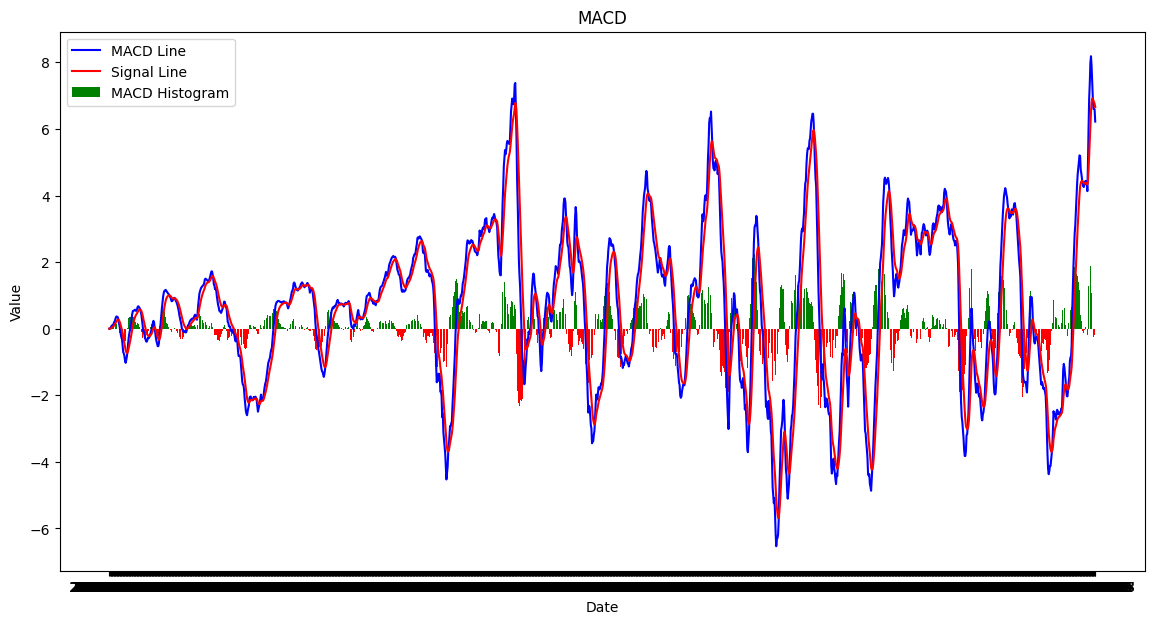

In [11]:
# Graphing MACD
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(14, 7))

# Plot MACD Line and Signal Line
plt.plot(df['date'], df['MACD_Line'], label='MACD Line', color='blue', linewidth=1.5)
plt.plot(df['date'], df['Signal_Line'], label='Signal Line', color='red', linewidth=1.5)

# Highlight Histogram
hist_color = df['MACD_Histogram'].apply(lambda x: 'green' if x >= 0 else 'red')
plt.bar(df['date'], df['MACD_Histogram'], color=hist_color, label='MACD Histogram')

plt.legend(loc='upper left')
plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

### Bollinger Bands Backtest

In [ ]:
# Backtesting bollingerbands trading strat:
# Example strategy implementation
def apply_bollinger_strategy(df):
    buy_signals = []
    sell_signals = []
    
    for i in range(len(df)):
        if df['Close'].iloc[i] < df['Bollinger_Lower_Band'].iloc[i] and df['RSI'].iloc[i] < 30:
            buy_signals.append(df['Close'].iloc[i])
            sell_signals.append(float('nan'))
        elif df['Close'].iloc[i] > df['Bollinger_Upper_Band'].iloc[i] and df['RSI'].iloc[i] > 70:
            buy_signals.append(float('nan'))
            sell_signals.append(df['Close'].iloc[i])
        else:
            buy_signals.append(float('nan'))
            sell_signals.append(float('nan'))
    
    df['Buy_Signal'] = buy_signals
    df['Sell_Signal'] = sell_signals
    return df

test_df = df.rename(columns={"Adj Close":"Close"})
# Apply strategy
bt_df = apply_bollinger_strategy(test_df)

# Display the DataFrame with Buy and Sell signals
print(bt_df.tail())

            date symbol       Close    Volume    return  Year Quarter  \
1628  2024-06-24   AAPL  208.139999  80727000  0.004468  2024      Q2   
1629  2024-06-25   AAPL  209.070007  56713900  0.019993  2024      Q2   
1630  2024-06-26   AAPL  213.250000  66213200  0.003986  2024      Q2   
1631  2024-06-27   AAPL  214.100006  49772700 -0.016254  2024      Q2   
1632  2024-06-28   AAPL  210.619995  82542700  0.000000  2024      Q2   

     Quarter_Label        RSI    Fast EMA    Slow EMA         OBV  \
1628        Q22024  65.240876  207.906656  202.714516  3444482400   
1629        Q22024  65.692967  208.118174  203.319800  3501196300   
1630        Q22024  67.534308  209.051234  204.265534  3567409500   
1631        Q22024  70.012249  209.969192  205.202150  3617182200   
1632        Q22024  63.705323  210.087520  205.718135  3534639500   

      Bollinger_Upper_Band  Bollinger_Lower_Band  Buy_Signal  Sell_Signal  
1628            221.015672            181.560326         NaN          

In [ ]:
bt_df

,date,symbol,Close,Volume,return,Year,Quarter,Quarter_Label,RSI,Fast EMA,Slow EMA,OBV,Bollinger_Upper_Band,Bollinger_Lower_Band,Buy_Signal,Sell_Signal
0,2018-01-02,AAPL,40.615887,102223600,-0.000174,2018,Q1,Q12018,NaN,40.615887,40.615887,-102223600,NaN,NaN,NaN,NaN
1,2018-01-03,AAPL,40.608807,118071600,0.004645,2018,Q1,Q12018,NaN,40.614599,40.615212,-220295200,NaN,NaN,NaN,NaN
2,2018-01-04,AAPL,40.797440,89738400,0.011386,2018,Q1,Q12018,NaN,40.647843,40.632567,-130556800,NaN,NaN,NaN,NaN
3,2018-01-05,AAPL,41.261944,94640000,-0.003715,2018,Q1,Q12018,NaN,40.759498,40.692508,-35916800,NaN,NaN,NaN,NaN
4,2018-01-08,AAPL,41.108673,82271200,-0.000115,2018,Q1,Q12018,NaN,40.822984,40.732143,-118188000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628,2024-06-24,AAPL,208.139999,80727000,0.004468,2024,Q2,Q22024,65.240876,207.906656,202.714516,3444482400,221.015672,181.560326,NaN,NaN
1629,2024-06-25,AAPL,209.070007,56713900,0.019993,2024,Q2,Q22024,65.692967,208.118174,203.319800,3501196300,221.508381,182.976618,NaN,NaN
1630,2024-06-26,AAPL,213.250000,66213200,0.003986,2024,Q2,Q22024,67.534308,209.051234,204.265534,3567409500,222.362889,184.448109,NaN,NaN
1631,2024-06-27,AAPL,214.100006,49772700,-0.016254,2024,Q2,Q22024,70.012249,209.969192,205.202150,3617182200,223.069752,186.122248,NaN,NaN
